# Qn 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd

# Creating a DataFrame
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
df = pd.DataFrame(data)

# Grouping by Customer_ID and calculating total purchases
total_purchases = df.groupby('Customer_ID')['Purchase_Amount'].sum().reset_index()

# Finding the top 3 frequent customers
top_customers = total_purchases.sort_values(by='Purchase_Amount', ascending=False).head(3)

print("Total Purchases per Customer:")
print(total_purchases)
print("\nTop 3 Frequent Customers:")
print(top_customers)

Total Purchases per Customer:
   Customer_ID  Purchase_Amount
0          101              520
1          102              600
2          103              480
3          104              300
4          105              400

Top 3 Frequent Customers:
   Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480


# Qn2

In [7]:
import pandas as pd
import numpy as np

# Creating the DataFrame
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}
df=pd.DataFrame(data)

In [11]:
Q1,Q3 = np.percentile(df['Sales'],[25,75])
IQR = Q3 - Q1

print(f"Q1:{Q1},Q3:{Q3},IQR:{IQR}")

Q1:31.5,Q3:83.75,IQR:52.25


In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print("Outliers: ",outliers)

Lower Bound: -46.875, Upper Bound: 162.125
Outliers:      Day  Sales
29   30    200


In [19]:
median_value = df['Sales'].median()

df['Sales'] = np.where((df['Sales'] < lower_bound) | (df['Sales'] > upper_bound), median_value, df['Sales'])
print(df)

    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


 # Qn3

In [22]:
import pandas as pd
from scipy import stats
# Creating the DataFrame
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}

df = pd.DataFrame(data)
df

,Group,Blood_Pressure
0,Treatment,120
1,Treatment,115
2,Treatment,118
3,Treatment,123
4,Treatment,122
5,Treatment,119
6,Treatment,124
7,Treatment,117
8,Treatment,116
9,Treatment,121


In [23]:
treatment_group = df[df['Group'] == 'Treatment']['Blood_Pressure']
control_group = df[df['Group'] == 'Control']['Blood_Pressure']

t_stat, p_value = stats.ttest_ind(treatment_group, control_group)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -11.870553692962726
P-Value: 6.008066605173374e-10


In [24]:
p = 0.05
if p_value < p:
    print("Reject the Null Hypothesis: The drug has a significant effect.")
else:
    print("Accpet the Null Hypothesis: The drug has no significant effect.")

Reject the Null Hypothesis: The drug has a significant effect.


# Qn4

In [25]:
import pandas as pd
import numpy as np

# Creating DataFrame
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central'],
    'TV_Ad_Budget': [200, 300, 400, 500, 600],
    'Social_Media_Budget': [150, 250, 300, 450, 500],
    'Sales': [20, 35, 50, 60, 80]
}
df = pd.DataFrame(data)
df

,Region,TV_Ad_Budget,Social_Media_Budget,Sales
0,North,200,150,20
1,South,300,250,35
2,East,400,300,50
3,West,500,450,60
4,Central,600,500,80


In [26]:
cov_tv = df['TV_Ad_Budget'].cov(df['Sales'])
cov_social = df['Social_Media_Budget'].cov(df['Sales'])

corr_tv = df['TV_Ad_Budget'].corr(df['Sales'])
corr_social = df['Social_Media_Budget'].corr(df['Sales'])

print(f"Covariance (TV vs Sales): {cov_tv}")
print(f"Covariance (Social Media vs Sales): {cov_social}")
print(f"Correlation (TV vs Sales): {corr_tv}")
print(f"Correlation (Social Media vs Sales): {corr_social}")

if abs(corr_tv) > abs(corr_social):
    print("TV Ads have a stronger impact on Sales.")
else:
    print("Social Media Ads have a stronger impact on Sales.")

Covariance (TV vs Sales): 3625.0
Covariance (Social Media vs Sales): 3225.0
Correlation (TV vs Sales): 0.9958640886279954
Correlation (Social Media vs Sales): 0.9724846021568381
TV Ads have a stronger impact on Sales.


# Qn5

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dataset: Delivery Times in Minutes
delivery_times = [25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 
                   85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 
                   25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 
                   150, 160]

In [28]:
mean_delivery = np.mean(delivery_times)
std_dev_delivery = np.std(delivery_times)

print(f"Mean Delivery Time: {mean_delivery}")
print(f"Standard Deviation of Delivery Time: {std_dev_delivery}")

Mean Delivery Time: 65.0625
Standard Deviation of Delivery Time: 41.718504212759115


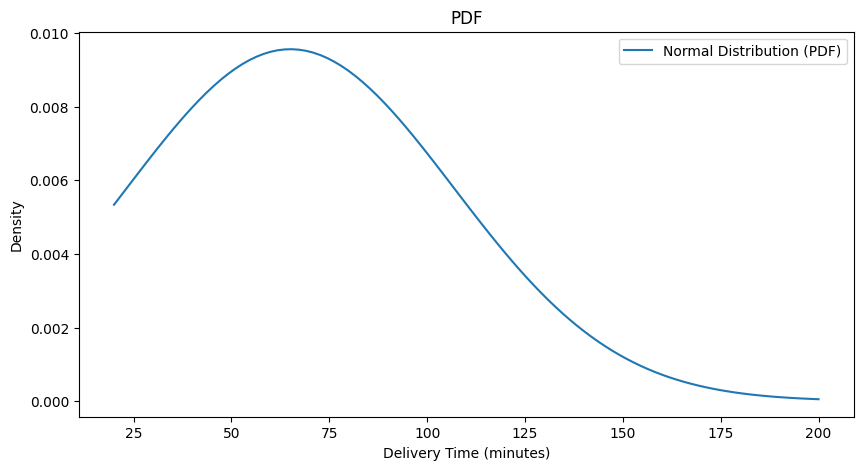

In [30]:
x = np.linspace(min(delivery_times), max(delivery_times), 100)
pdf = norm.pdf(x, mean_delivery, std_dev_delivery)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label='Normal Distribution (PDF)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')
plt.title('PDF')
plt.legend()
plt.show()